In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

# Import Dataset

In [2]:
# Import the dataset
heart_df = pd.read_excel('heart.xlsx', sheet_name = 'heart')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Description

In [3]:
# Print basic information of the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Show the statistical information of the dataset
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Tried Pandas Profiling to generate a better report
pp.ProfileReport(heart_df)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


# Data Analysis

In [6]:
# Create a copy of the original dataset
heart_copy = heart_df.copy()
# Create the independent columns and the output column
X = heart_copy.drop('output', axis = 1)
y = heart_copy.output
# Calculate the chi2 measure
chi2_features = SelectKBest(score_func=chi2, k=10)
fit = chi2_features.fit(X, y)
chi2_scores = pd.DataFrame(fit.scores_)
# Generate a dataframe containing the chi2 scores and the variable names
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns, chi2_scores], axis = 1)
featureScores.columns = ['Variables','Score']
print(featureScores.nlargest(12, 'Score'))

   Variables       Score
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835
12     thall    5.791853
6    restecg    2.978271


[0.0722659  0.05528195 0.13053428 0.06176355 0.06165271 0.01972332
 0.03754033 0.08345029 0.0993782  0.08480464 0.06549198 0.12484695
 0.1032659 ]


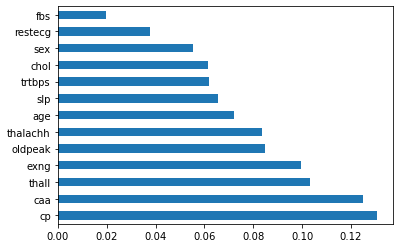

In [7]:
# This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) 
# on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

# Perform a extra-trees classifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
# Show the bar graph of these importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind = 'barh')
plt.show()

<AxesSubplot:>

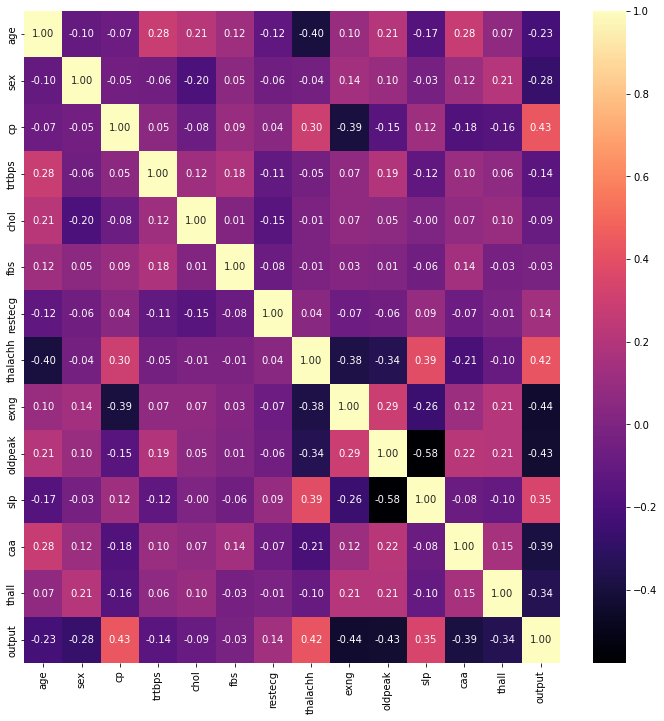

In [8]:
# Generate a heatmap of the correlations of the variables
plt.figure(figsize=(12,12))
sns.heatmap(heart_df.corr(), annot = True, cmap = "magma", fmt = '.2f')

# Data Visualization

In [9]:
# Create another copy of the dataset
df_copy = heart_df.copy()
# Change some of the variables to texts
df_copy['sex'] = np.where(df_copy['sex'] == 1, 'male', 'female')
df_copy['output'] = np.where(df_copy['output'] == 1, 'Heart Disease', 'No Heart Disease')
df_copy['cp'] = pd.cut(df_copy.cp,
                       bins = [-np.inf, 0, 1, 2, 3],
                       labels = ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
df_copy['thall'] = pd.cut(df_copy.thall,
                          bins = [-np.inf, 0, 1, 2, 3],
                          labels = ["NULL", "Fixed Defect", "Normal", "Reversable Defect"])
df_copy['exng'] = np.where(df_copy['exng'] == 1, 'Yes', 'No')
# Check whether the change was successful
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,Asymptomatic,145,233,1,0,150,No,2.3,0,0,Fixed Defect,Heart Disease
1,37,male,Non-anginal Pain,130,250,0,1,187,No,3.5,0,0,Normal,Heart Disease
2,41,female,Atypical Angina,130,204,0,0,172,No,1.4,2,0,Normal,Heart Disease
3,56,male,Atypical Angina,120,236,0,1,178,No,0.8,2,0,Normal,Heart Disease
4,57,female,Typical Angina,120,354,0,1,163,Yes,0.6,2,0,Normal,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,Typical Angina,140,241,0,1,123,Yes,0.2,1,0,Reversable Defect,No Heart Disease
299,45,male,Asymptomatic,110,264,0,1,132,No,1.2,1,0,Reversable Defect,No Heart Disease
300,68,male,Typical Angina,144,193,1,1,141,No,3.4,1,2,Reversable Defect,No Heart Disease
301,57,male,Typical Angina,130,131,0,1,115,Yes,1.2,1,1,Reversable Defect,No Heart Disease


Text(0.5, 1.0, 'Gender vs Output')

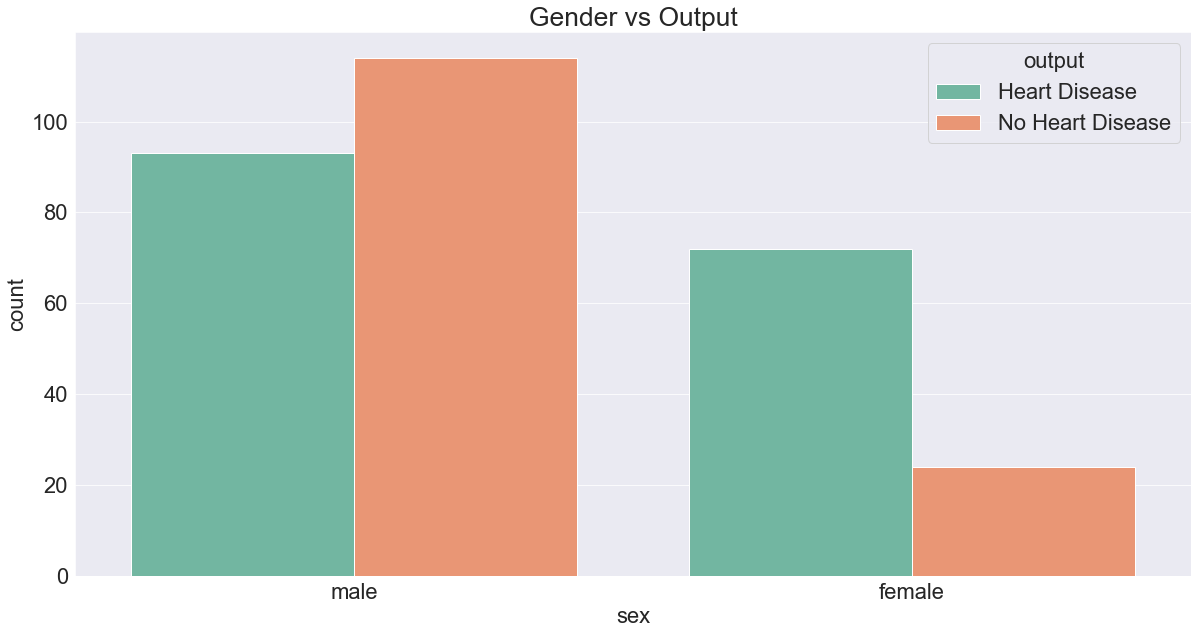

In [30]:
# Set style of the plots
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams.update({'font.size': 22})
# Make a plot of Gender vs Output
sns.countplot(data = df_copy, x = 'sex', hue = 'output')
plt.title('Gender vs Output')

Text(0.5, 1.0, 'Chest Pain Type vs Heart Attack Output')

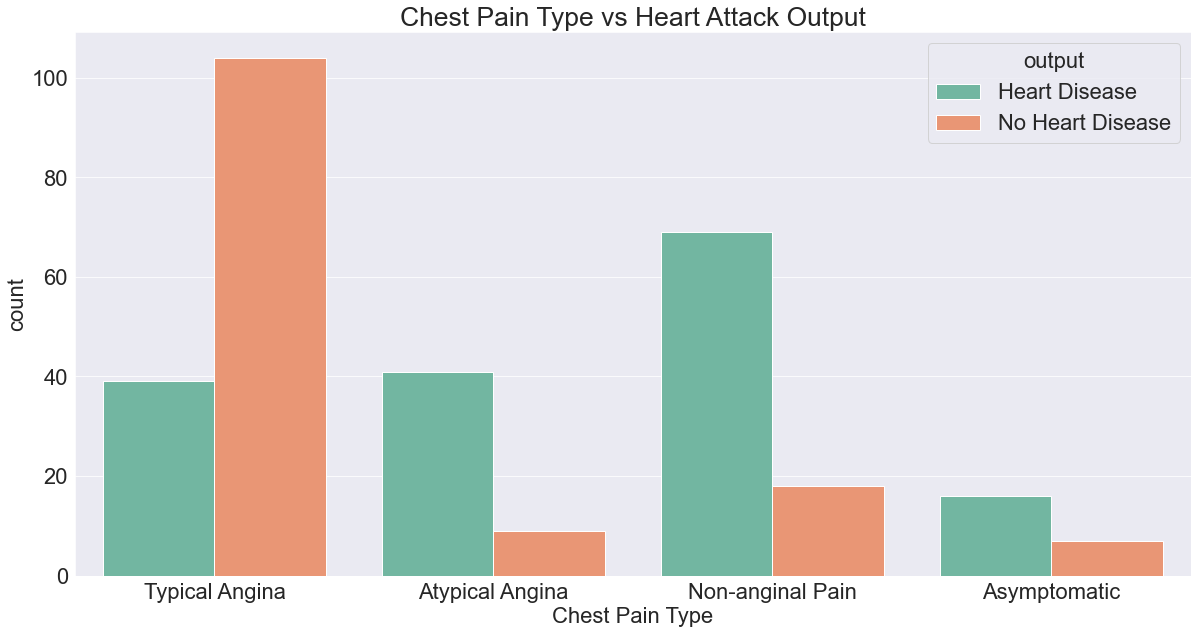

In [11]:
# Make a plot that compares the chest pain type and heart attck output
sns.countplot(data = df_copy, x = 'cp', hue = 'output')
plt.xlabel('Chest Pain Type')
plt.title('Chest Pain Type vs Heart Attack Output')

Text(0.5, 1.0, 'Gender vs Thalassemia')

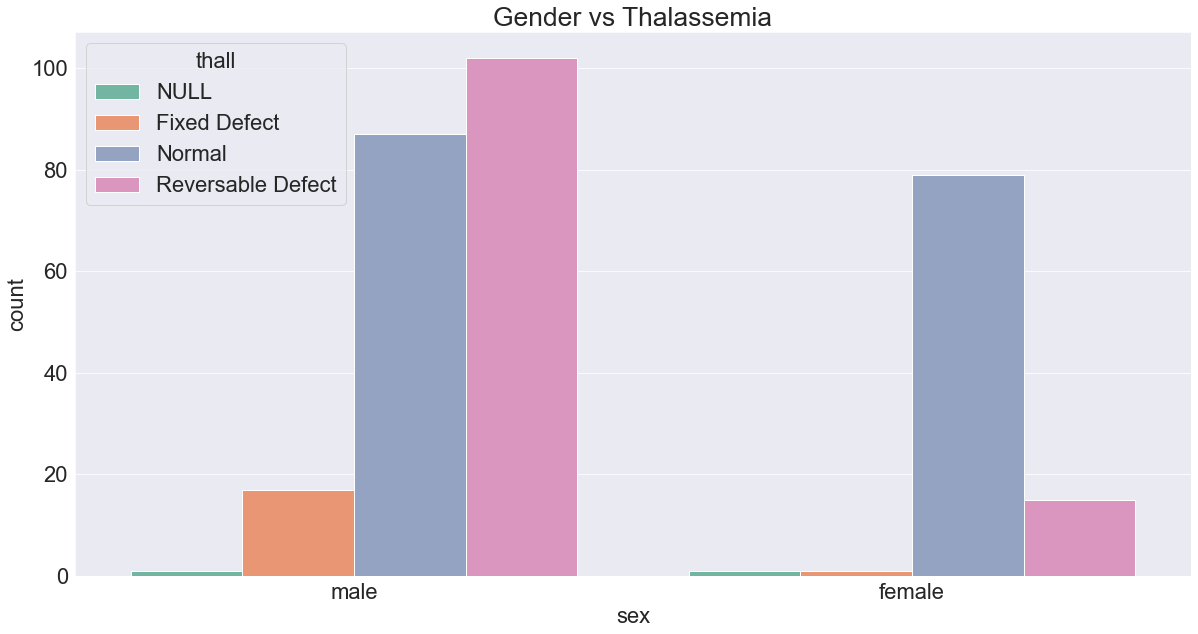

In [12]:
# Make a plot that shows Gender and Thalassemia
sns.countplot(data = df_copy, x = 'sex', hue = 'thall')
plt.title('Gender vs Thalassemia')

Text(0.5, 1.0, 'Slope vs Heart Attack Output')

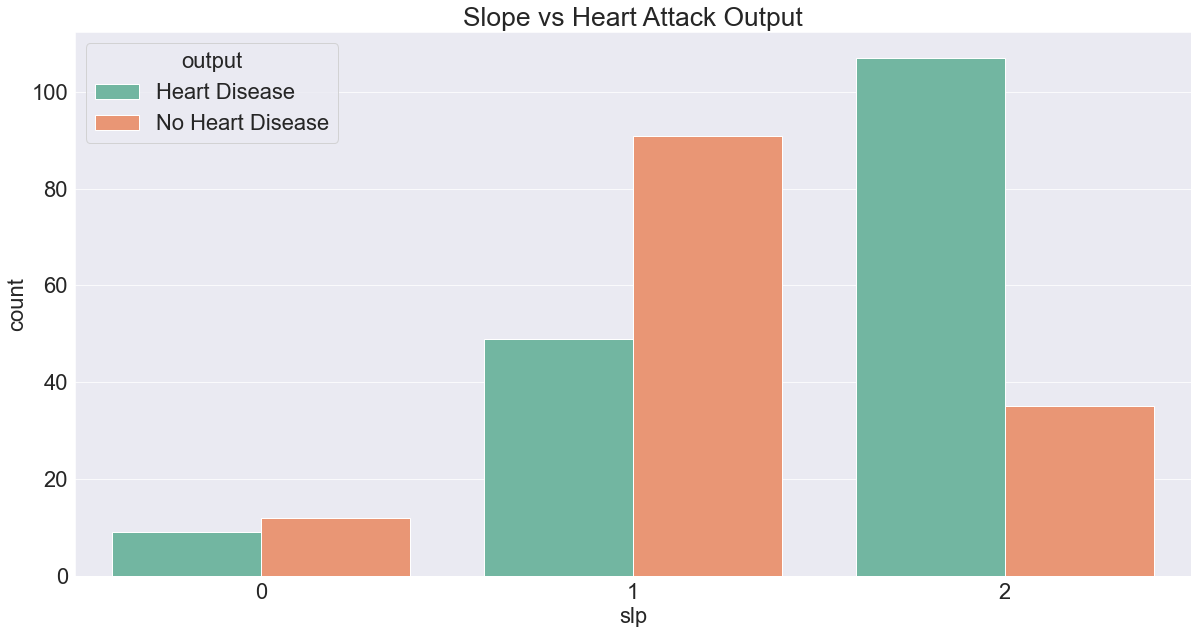

In [13]:
# Make a plot that shows the slope and heart attck output
sns.countplot(data = df_copy, x = 'slp', hue = 'output')
plt.title('Slope vs Heart Attack Output')

Text(0.5, 1.0, 'Exercise Induced Angina vs Thalassemia')

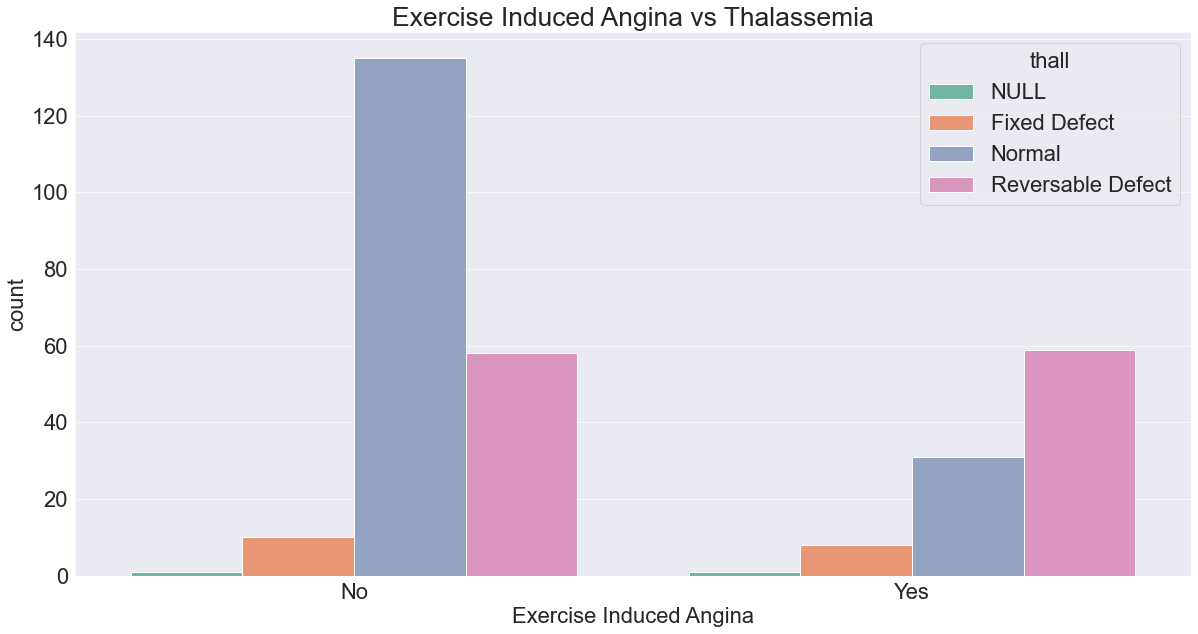

In [14]:
# Make a plot that shows exercise induced angina and thalassemia
sns.countplot(data = df_copy, x = 'exng', hue = 'thall')
plt.xlabel('Exercise Induced Angina')
plt.title('Exercise Induced Angina vs Thalassemia')

Text(0.5, 1.0, 'Age of Heart Diseased Patients')

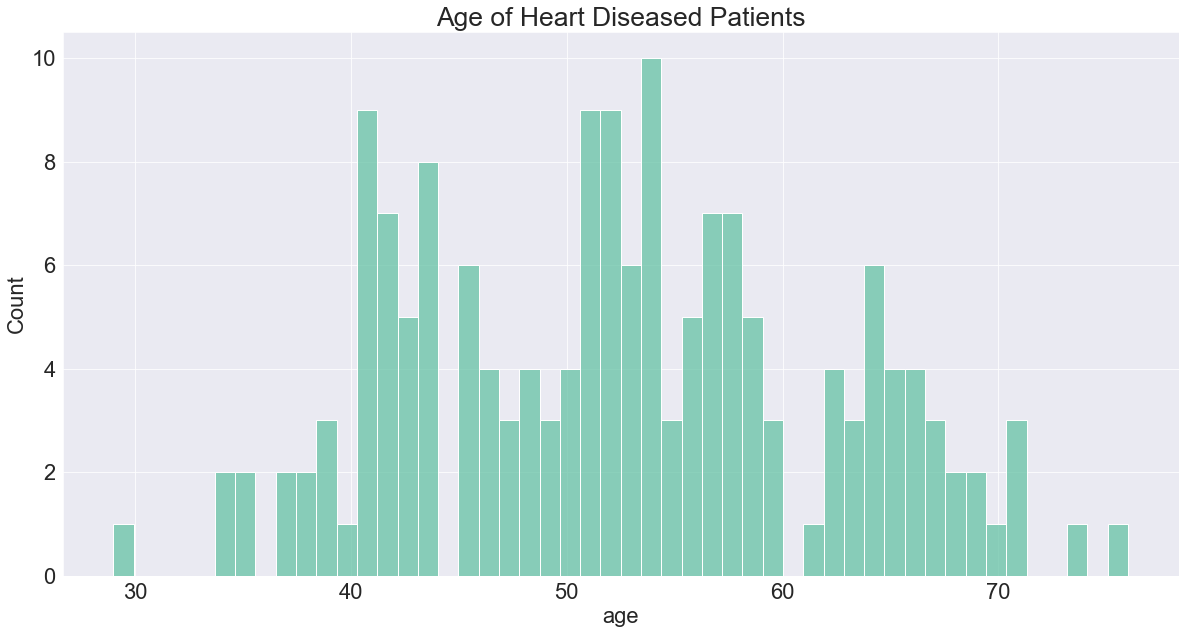

In [15]:
# Makes a histogram to show the age distribution of patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['age'], kde = False, bins = 50)
plt.title('Age of Heart Diseased Patients')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients')

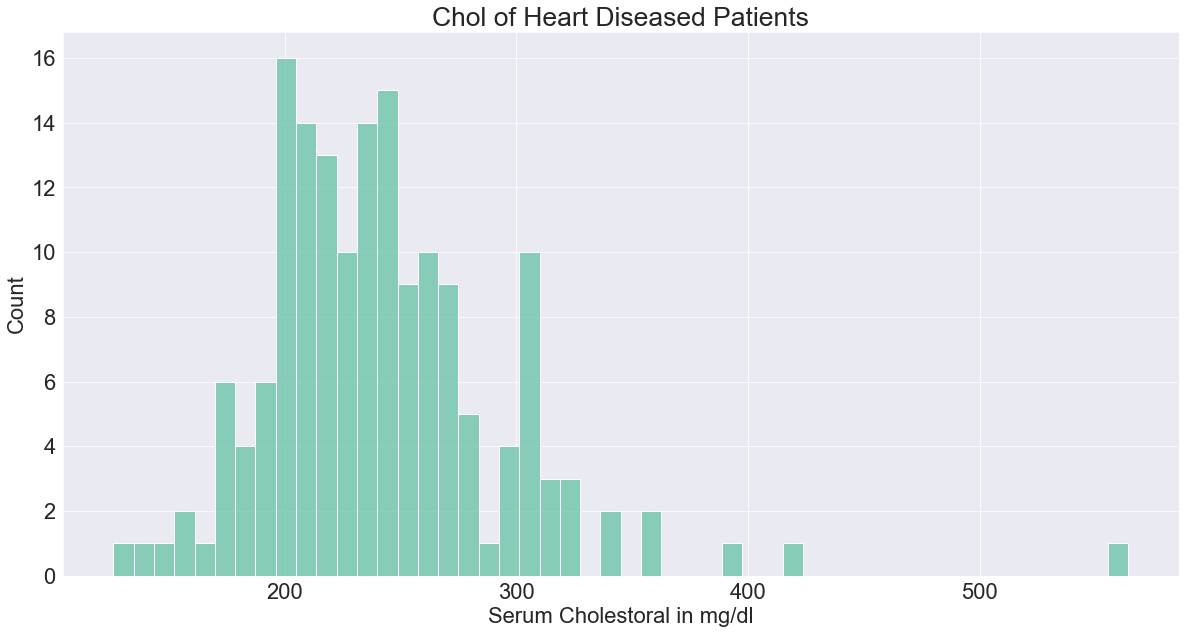

In [16]:
# Makes a histogram that shows the serum cholestoral distribution of patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['chol'], kde = False, bins = 50)
plt.xlabel('Serum Cholestoral in mg/dl')
plt.title('Chol of Heart Diseased Patients')

Text(0.5, 1.0, 'Maximum Heart Rate Achieved of Heart Diseased Patients')

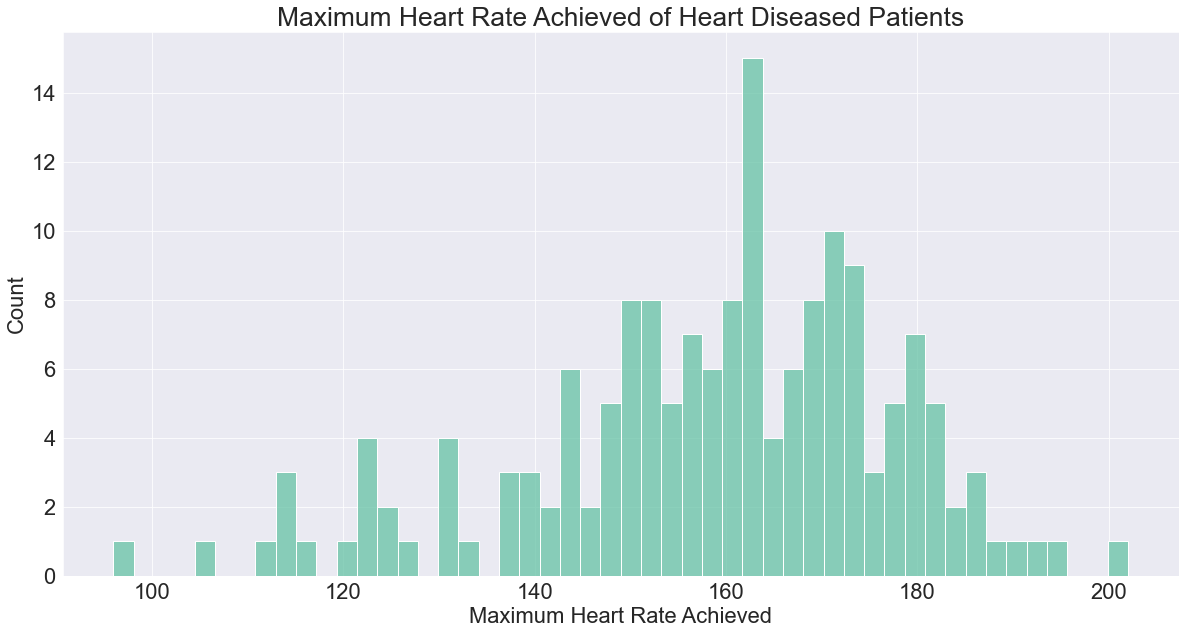

In [17]:
# Makes a histogram that shows the maximum heart rate distribution of the patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['thalachh'], kde = False, bins = 50)
plt.xlabel('Maximum Heart Rate Achieved')
plt.title('Maximum Heart Rate Achieved of Heart Diseased Patients')

# Decision Tree

In [18]:
# Makes indepent columns and output column
X = heart_df.drop('output', axis = 1)
y = heart_df.output
# Makes training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Perfrom a decision tree classification
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_prediction = decision_tree.predict(X_test)
# Show the accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_prediction))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_prediction))

Accuracy: 0.7377049180327869
Confusion Matrix:
 [[23  7]
 [ 9 22]]


# Logistic Regression

In [19]:
# Construct the logistic regression and print the marginal effect summary table
logit_regression = smf.logit("output ~ age + sex + C(cp) + trtbps + chol + fbs + C(restecg) + thalachh + exng + caa", data = heart_df).fit()
logit_regression.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.386917
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                 output
Method:                          dydx
At:                           overall
===================================================================================
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(cp)[T.1]          0.2017      0.060      3.353      0.001       0.084       0.320
C(cp)[T.2]          0.2278      0.045      5.084      0.000       0.140       0.316
C(cp)[T.3]          0.2117      0.071      2.977      0.003       0.072       0.351
C(restecg)[T.1]     0.0604      0.042      1.452      0.146      -0.021       0.142
C(restecg)[T.2]    -0.1007      0.216     -0.467      0.641      -0.523       0.322
age                -0.0007      0.003     -0.269      0.788      -0.006       0.005
sex                -0.2439      0.047     -5.233      0.000      -0.335      -0.153
trtbps             -0.0025      0.001     -2.116      0.034      -0.005      -0.000
chol               -0.0008      0.000     -1.866      0.062      -0.002    4.18e-05
fbs                 0.0267      0.059      0.449      0.654      -0.090       0.143
thalachh            0.0039      0.001      3.426      0.001       0.002       0.006
exng               -0.1354      0.046     -2.943      0.003      -0.226      -0.045
caa                -0.0961      0.018     -5.213      0.000      -0.132      -0.060
===================================================================================
"""

In [20]:
# Crtaed the predictor values and the outcome variables
X1 = heart_df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "caa"]]
X = pd.get_dummies(X1, drop_first = True, columns = ["cp", "restecg"]).values
y = heart_df["output"].values
# Create a logistic regression model with sklearn
sklearn_logistic = LogisticRegression(penalty = 'none', solver = 'newton-cg').fit(X,y)

In [21]:
# Print the coefficients and intercept of the sklearn model
print('Coefficients:', sklearn_logistic.coef_)
print('Intercept:', sklearn_logistic.intercept_)

Coefficients: [[-0.005895   -1.98329766 -0.02046839 -0.0067561   0.21704089  0.03143576
  -1.10053621 -0.7810178   1.63967306  1.85199598  1.72131217  0.49135372
  -0.8183129 ]]
Intercept: [1.27592952]


In [22]:
# Compute the probability of having a heart attack
heart_atk_prob = sklearn_logistic.predict_proba(X)
heart_atk_prob = heart_atk_prob[:, 1]
# Print the first 10 probabilities
heart_atk_prob[0:10]

array([0.73747292, 0.95009482, 0.98273609, 0.93329594, 0.64723178,
       0.48443415, 0.92712108, 0.91447981, 0.85496034, 0.92854194])

In [23]:
# Predict the outcome labels (whether or not a person will have heart attack)
heart_atk_label = sklearn_logistic.predict(X)
# Print the first 10 labels
heart_atk_label[0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
# Convert probabilities to the labels using threshold 0.5
prob_label = np.where(heart_atk_prob > 0.5, 1, 0)
prob_label 

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [25]:
# Calculate the accuracy score for the predicted output labels
accuracy = accuracy_score(y, heart_atk_label)
print('Accuracy of the predicted output labels:', accuracy)

Accuracy of the predicted output labels: 0.8217821782178217


In [26]:
cm = confusion_matrix(y, heart_atk_label)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[106  32]
 [ 22 143]]
